In [1]:
import numpy as np
import pyclesperanto_prototype as cle
from skimage.io import imsave
from utils import show

cle.select_device("RTX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

In [2]:
max_random = 0.25

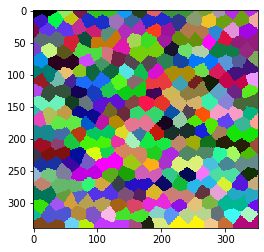

In [3]:
cells = cle.artificial_tissue_2d(width=350, height=350)

cle.imshow(cells, labels=True)

In [4]:
imsave("cells.tif", np.asarray(cells))

<ipython-input-4-377fc126e76d>:1: UserWarning: cells.tif is a low contrast image
  imsave("cells.tif", np.asarray(cells))


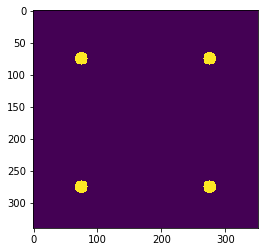

In [5]:
values = cle.create_like(cells)
cle.set(values, 0)
cle.draw_sphere(values, x=75, y=275, radius_x=10, radius_y=10)
cle.draw_sphere(values, x=275, y=275, radius_x=10, radius_y=10)
cle.draw_sphere(values, x=275, y=75, radius_x=10, radius_y=10)
cle.draw_sphere(values, x=75, y=75, radius_x=10, radius_y=10)

show(values)

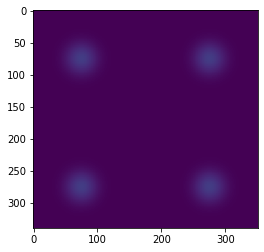

In [6]:
blurred_image = cle.gaussian_blur(values, sigma_x=16, sigma_y=16)

show(blurred_image)

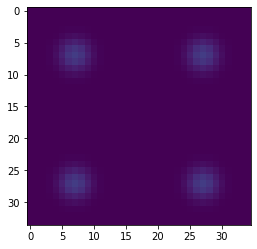

In [7]:
factor = 0.1
scaled_pixels = cle.create([int(blurred_image.shape[0] * factor), int(blurred_image.shape[1] * factor)])
cle.scale(blurred_image, scaled_pixels, factor_x=factor, factor_y=factor)

show(scaled_pixels)

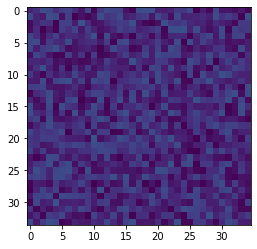

In [8]:
random_image = cle.push(np.random.uniform(high=max_random, size=scaled_pixels.shape))

show(random_image)

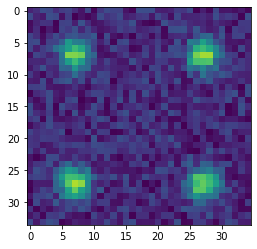

In [9]:
pixel_image = (cle.push(random_image) + scaled_pixels * (1.0 / scaled_pixels.max()) * (1.0 - max_random))

show(pixel_image)

In [10]:
imsave("pixel_image.tif", np.asarray(pixel_image))

In [11]:
measurements = cle.statistics_of_background_and_labelled_pixels(blurred_image, cells)
intensities = measurements['mean_intensity']
intensities[0:10]

# workaround to deal with background-intensity being nan
intensities[0] = 0

C:\Users\rober\miniconda3\envs\bio6\lib\site-packages\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:168: RuntimeWarning: overflow encountered in subtract
  bbox_max_y - bbox_min_y + 1,
C:\Users\rober\miniconda3\envs\bio6\lib\site-packages\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:169: RuntimeWarning: overflow encountered in subtract
  bbox_max_x - bbox_min_x + 1,
C:\Users\rober\miniconda3\envs\bio6\lib\site-packages\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:180: RuntimeWarning: overflow encountered in subtract
  region_props['bbox_width'] = bbox_max_x - bbox_min_x + 1
C:\Users\rober\miniconda3\envs\bio6\lib\site-packages\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:181: RuntimeWarning: overflow encountered in subtract
  region_props['bbox_height'] = bbox_max_y - bbox_min_y + 1
C:\Users\rober\miniconda3\envs\bio6\lib\site-packages\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:182: Run

In [12]:
random = np.random.uniform(high=max_random, size=intensities.shape)
random[0:10]

array([0.07614675, 0.18377479, 0.00629164, 0.01899881, 0.19476925,
       0.22679473, 0.00303783, 0.12792781, 0.17064877, 0.03785933])

In [13]:
new_values = random + intensities * (1.0 / intensities.max()) * (1.0 - max_random)
new_values[0:10]

array([0.07614675, 0.1837748 , 0.00629225, 0.01902625, 0.19487977,
       0.22683551, 0.0030414 , 0.12792785, 0.17064877, 0.03785933])

In [14]:
new_values.shape

(331,)

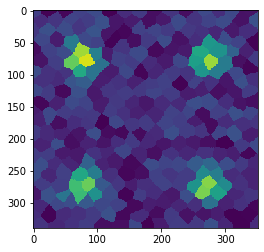

In [15]:
parametric_image = cle.replace_intensities(cells, new_values)

show(parametric_image)

In [16]:
imsave("parametric_image.tif", np.asarray(parametric_image))